In [1]:
import numpy as np 
import pandas as pd #DATA를 표로 시각화하기위해 pandas 불러옴

In [2]:
train= pd.read_csv(r'C:\Users\user\Desktop\titanic\train.csv')
test = pd.read_csv(r'C:\Users\user\Desktop\titanic\test.csv')
#저장된 위치에서 train & test data 불러옴

In [3]:
train.head() #train data check

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info() #null data check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe() #train data 자세히 보기.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum() #train 중 null data 수치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#plt와 sns로 data를 효과적으로 시각화함

In [8]:
def bar_chart(feature): 
    survived = train[train['Survived']==1][feature].value_counts() 
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
#feature = PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
#suvived일때 feature==1, dead일때 feature==0
#'bar'모양으로 그래프 나타냄. 

# TITLE
NAME에서 '~씨'를 추출하여 TITLE을 새롭게 생성했다.
이후 TITLE에서
Mr = 0
Miss & Mlle = 1
Mrs & Mme(Madam) = 2
Master = 3
Other = 4 로 TITLE을 NUMERIC하게 변경해주었다.

In [9]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) 
#train & test feature 중 NAME에서 '~씨'만 추출하여 TITLE을 생성.

In [10]:
train['Title'].value_counts() #train data 중 NAME에서 추출한 TITLE과 인원 확인

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Ms            1
Mme           1
Lady          1
Don           1
Sir           1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

In [11]:
test['Title'].value_counts() #test data 중 NAME에서 추출한 TITLE과 인원 확인

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [12]:
title_num = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 1,"Countess": 4,
                 "Ms": 1, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 2,"Capt": 4,"Sir": 4 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_num)
#Mr, Miss & Ms. Mrs & Mme(Madame), Master, Other로 나눔
#이중 개체수 적은 Group은 Other로 두어 복잡도를 낮춰주었다.

In [13]:
test['Title'].value_counts() #새롭게 organized된 Tilte.

0    240
1     79
2     72
3     21
4      6
Name: Title, dtype: int64

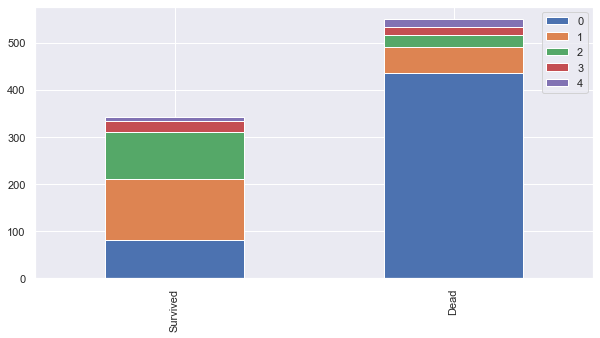

In [14]:
bar_chart('Title')

In [15]:
train.drop('Name', axis=1, inplace=True) 
test.drop('Name', axis=1, inplace=True)
#NAME은 DROP 시키고 TITLE을 numeric하게 나타냄.

# SEX
(MALE, FEMALE)==(0,1)로 SEX를 NUMERIC하게 변환

In [16]:
sex_num = {"male": 0, "female": 1} #sex를 numeric하게 변환
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_num)

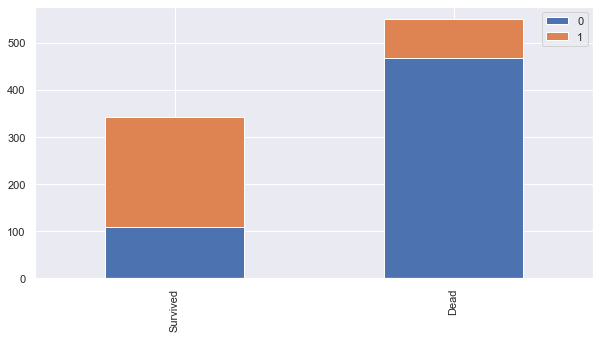

In [17]:
bar_chart('Sex')

# AGE
177개의 data가 지워졌다.
이 NULL된 data를 각 TITLE의 MEDIAN값으로 넣어주었고,
AGE를 5구간으로 일정하게 나눠줌

In [18]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)
#NULL된 AGE를 각 TITLE의 MEDIAN값으로 넣어줌

In [19]:
for dataset in train_test_data:
    dataset. loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset. loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset. loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset. loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset. loc[ dataset['Age'] > 62, 'Age'] = 4
#AGE를 5구간으로 일정하게 나눠줌    

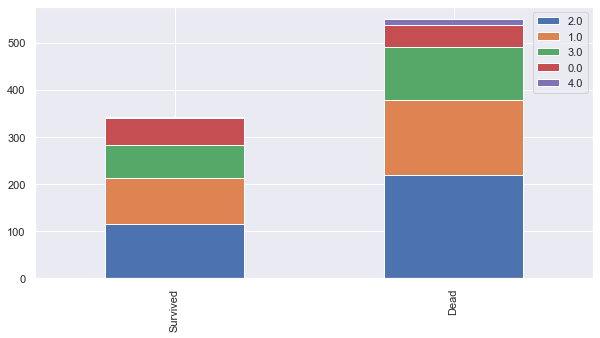

In [20]:
bar_chart('Age')

# EMBARKED
2개의 data가 지워졌다. EMBARKED의 train data 중 S가 가장 많으므로 Null을 모두 S로 채움

In [21]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
#train data 중 NAN가 2개라 가장 많은 DATA인 S로 채워줌

In [23]:
Embarked_num = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(Embarked_num) 
#Embarked을 Embarked_num을 통해 numeric data로 변경    

In [24]:
train['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

# FARE
FARE를 5구간으로 Binning하여 Fare_Bin이란 값을 정의.
이후 Fare_Bin을 Numeric한 값으로 변경.

In [25]:
train['Fare_Bin'] = pd.qcut(train['Fare'], 5) #qcut을 통해 요금을 5구간으로 Binning함 
test['Fare_Bin'] = pd.qcut(test['Fare'], 5)

train['Fare_Bin'].value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare_Bin, dtype: int64

In [26]:
#Fare_Bin을 numeric한 값으로 변경
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare_Bin'].astype('category').cat.codes
train['Fare'].value_counts()

1    184
3    180
0    179
4    176
2    172
Name: Fare, dtype: int64

# CABIN
가장 많은 값이 null된 cabin은 맨 앞의 Alphabet만 가져옴.
이후 numeric한 값으로 변환 후 data손실이 적은 Pclass로 Group한 median값을 적용.

In [27]:
train['Cabin'].str[:1].value_counts()
#CABIN의 맨 앞 Alphabet만 사용.

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [28]:
Cabin_num={'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
    dataset['Cabin'] = dataset['Cabin'].map(Cabin_num)
    dataset['Cabin'] = dataset.groupby('Pclass')['Cabin'].transform('median')
#Cabin을 numeric하게 변환 후 Pclass의 median값 적용    

In [29]:
train['Cabin'].value_counts()

5.0    491
2.0    216
4.5    184
Name: Cabin, dtype: int64

# FAMILYSIZE = SIBSP + PARCH OR SOLS

In [30]:
for dataset in train_test_data:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    #FAMILYSIZE = SIBSP + PARCH 를 도입

In [31]:
train['Solo'] = (train['FamilySize'] == 1) #혼자 탄 경우를 SOLO로
test['Solo'] = (test['FamilySize'] == 1)

In [32]:
train.head(10) #10개의 train data로 앞 서 numeric하게 변환 된 걸 확인

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,FamilySize,Solo
0,1,0,3,0,1.0,1,0,A/5 21171,0,5.0,0,0,"(-0.001, 7.854]",2,False
1,2,1,1,1,3.0,1,0,PC 17599,4,2.0,1,2,"(39.688, 512.329]",2,False
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,1,5.0,0,1,"(7.854, 10.5]",1,True
3,4,1,1,1,2.0,1,0,113803,4,2.0,0,2,"(39.688, 512.329]",2,False
4,5,0,3,0,2.0,0,0,373450,1,5.0,0,0,"(7.854, 10.5]",1,True
5,6,0,3,0,2.0,0,0,330877,1,5.0,2,0,"(7.854, 10.5]",1,True
6,7,0,1,0,3.0,0,0,17463,4,2.0,0,0,"(39.688, 512.329]",1,True
7,8,0,3,0,0.0,3,1,349909,2,5.0,0,3,"(10.5, 21.679]",5,False
8,9,1,3,1,2.0,0,2,347742,2,5.0,0,2,"(10.5, 21.679]",3,False
9,10,1,2,1,0.0,1,0,237736,3,4.5,1,2,"(21.679, 39.688]",2,False


In [33]:
feature = ['Pclass','Sex','Embarked','FamilySize','Solo','Title','Age','Cabin',
    'Fare']
# 정리된 Feature
label = ['Survived']

# Modelling

In [34]:
from sklearn.model_selection import KFold, cross_val_score
#cross_val_score을 사용해서 k-fold 교차검증을 수행.
from sklearn.ensemble import RandomForestClassifier
#binary classification로 RandomForestClassifier사용.
data = train[feature]
target = train[label]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
#n_splits=10, dataset을 10개로 나눔.
#Shuffle=True, Fold를 나누기 전에 무작위로 섞음으로써 편중확률 감소시킴.
clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
#개별모델 정의
#n_estimators로 50개의 tree 생성, max_depth는 트리의 최대 깊이

cross_val_score(clf, data, target, cv=k_fold, scoring='accuracy', ).mean() #평균검증정확도

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

0.8260299625468164

In [35]:
x_train = train[feature]
x_test = test[feature]
y_train = train[label]

clf.fit(x_train, y_train)


<ipython-input-35-bf3b2888266f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=50, random_state=0)

In [36]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [37]:
submission['Survived'] = clf.predict(x_test)
submission.to_csv('titanic-submission.csv',index=False)

In [38]:
submission.to_csv(r'C:\Users\user\Desktop\titanic\submission.csv', index=False)

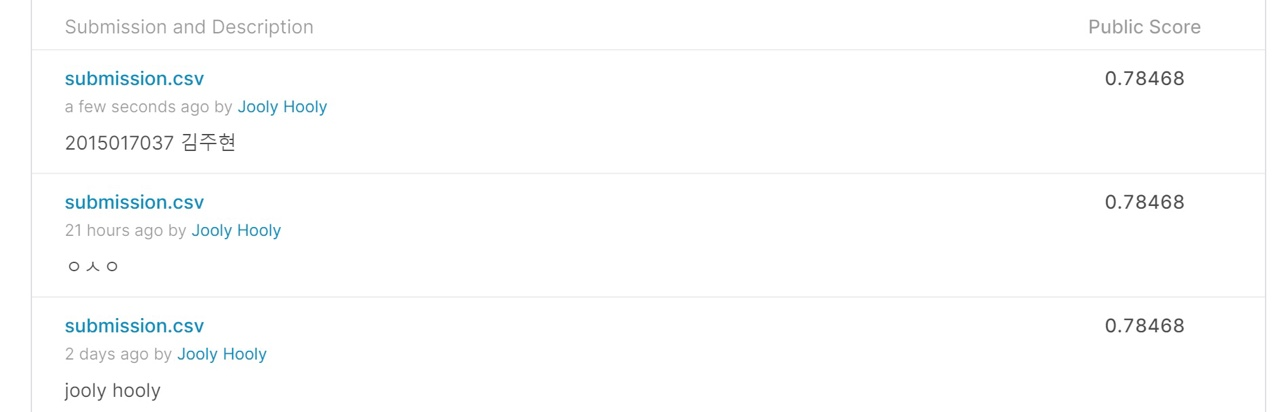